### Name: Dr. Sachin Kanhurkar
### Data Scientist, Hloov
### PhD, IIT Bombay, Mumbai
### Mob. No. 8600202244
### Email ID: sachinkanhurkar78@gmail.com
### Linked In Profile: https://www.linkedin.com/in/sachin-kanhurkar-02a07383


## Q1. Explain Basic Life Cycle of Data Science Project.
### I am listing below the cycle of the Data Science project. This life cycle includes the employees: Data Engineer, Data Analyst, Data Scientist, Machine Learning Engineer, Business Analyst. Each employee contributes in the different stages of project cycle.

### -> Business understanding 
### -> Data requirement for the add the business value -- Type:- Live Streaming Data, Batch Data
### -> Insert the Batch data into the Data Bases/Blob Storage etc.
### -> Query the Data from Data bases , do the ETL process and load into DB/storage for the modeling
### -> Development of model: train the model and save the model
### -> Evalute the model to check the model efficiency 
### -> Deployment of model on cloud/local server
### -> Use the new data in deployed model to find the result/output to get business value
### -> Save the output dataset in Data base/blob storage
### -> Find the business value from the output dataset and show it on the PowerBi/Tableau or other Bi tool to show stakeholder.


## Q2. Why do you want to join Apollo Energy Analytics?
### I am Dr. Sachin Kanhurkar; I understand the energy domain and know numerical and data-based modeling. My experience and interest also align with the company's mission and vision. I want to build my career more around the Mechanical, Energy, or Manufacturing industries, where I can contribute to the company with my domain knowledge and Data Science skills. Apollo Energy Analytics is working in one of the mentioned domains. Therefore, I want to join this company. Apart from this, the company is working towards achieving the zero carbon emission goal, which attracts my attention.  

## **********************************
## Content of the Notebook:
### Section 1: EDA for the World Covid Data
### Section 2: Locationwise EDA
### Section 3: EDA of Covid cases in India
### Section 4: Forecast the Covid cases in world using SARIMA and LSTM Models
### Section 5: Conclusion   
    
    

In [33]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("df_covid19_countries.csv")

# Section 1: EDA for the World Covid Data

In [3]:
data.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000012
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234802 entries, 0 to 234801
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 234802 non-null  object 
 1   date                     234802 non-null  object 
 2   total_cases              234802 non-null  float64
 3   new_cases                234802 non-null  float64
 4   new_cases_smoothed       234802 non-null  float64
 5   total_deaths             234802 non-null  float64
 6   new_deaths               234802 non-null  float64
 7   new_deaths_smoothed      234802 non-null  float64
 8   reproduction_rate        234802 non-null  float64
 9   total_vaccinations       234802 non-null  float64
 10  people_vaccinated        234802 non-null  float64
 11  people_fully_vaccinated  234802 non-null  float64
 12  total_boosters           234802 non-null  float64
 13  population               234802 non-null  float64
 14  vacc

In [5]:
data['date'] = pd.to_datetime(data['date'].astype(str), format="%Y-%m-%d %H:%M:%S") # Chnage the data type to datetime

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234802 entries, 0 to 234801
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   location                 234802 non-null  object        
 1   date                     234802 non-null  datetime64[ns]
 2   total_cases              234802 non-null  float64       
 3   new_cases                234802 non-null  float64       
 4   new_cases_smoothed       234802 non-null  float64       
 5   total_deaths             234802 non-null  float64       
 6   new_deaths               234802 non-null  float64       
 7   new_deaths_smoothed      234802 non-null  float64       
 8   reproduction_rate        234802 non-null  float64       
 9   total_vaccinations       234802 non-null  float64       
 10  people_vaccinated        234802 non-null  float64       
 11  people_fully_vaccinated  234802 non-null  float64       
 12  total_boosters  

In [7]:
data.shape

(234802, 17)

In [8]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 17)

In [9]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
count,2.348020e+05,2.348020e+05,234802.000000,2.348020e+05,234802.000000,234802.00000,234802.000000,2.348020e+05,2.348020e+05,2.348020e+05,2.348020e+05,2.348020e+05,234802.000000,234802.000000,234802.000000
mean,1.180986e+06,2.871597e+03,2862.145891,1.698854e+04,28.458586,28.39477,0.711076,1.982706e+07,6.347938e+06,5.288981e+06,1.628078e+06,3.643463e+07,12.415381,6.506534,0.022642
std,5.247207e+06,1.746037e+04,16125.352068,7.064676e+04,151.755632,142.70809,0.517298,1.713780e+08,4.959491e+07,4.305914e+07,1.291695e+07,1.408715e+08,26.186637,11.693599,0.161368
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,-0.080000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000,0.000000,0.000000
25%,2.389000e+03,0.000000e+00,1.857000,2.500000e+01,0.000000,0.00000,0.040000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.242720e+05,0.000000,0.073698,0.000000
50%,3.472200e+04,2.000000e+01,47.857000,4.720000e+02,0.000000,0.42900,0.840000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.336393e+06,0.000000,0.884724,0.000274
75%,3.767355e+05,5.130000e+02,640.714000,5.707000e+03,5.000000,6.85700,1.080000,4.818375e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.620798e+07,0.000000,7.629241,0.007739
max,1.010440e+08,1.355241e+06,806904.857000,1.095235e+06,4529.000000,4190.00000,5.820000,3.479607e+09,1.307222e+09,1.274018e+09,8.157180e+08,1.425887e+09,129.066316,70.435945,32.441022


In [10]:
data.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
vaccination_ratio          0
prevalence                 0
incidence                  0
dtype: int64

In [110]:
location_list = list()
location_list=data['location'].unique()
print(location_list)
print(len(location_list))


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland

In [25]:
data1 = data.groupby('date').agg('sum').reset_index()

In [ ]:
data1.tail()

In [82]:
data1.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
1095,2022-12-31,673943479.0,259724.0,478940.430,6712370.0,721.0,1592.576,0.0,7.758474e+09,1.976164e+09,1.707294e+09,847553526.0,8.009947e+09,1972.628896,4079.754520,1.694096
1096,2023-01-01,674251203.0,307724.0,489251.429,6713202.0,832.0,1608.147,0.0,7.855594e+09,1.870231e+09,1.741301e+09,746717305.0,8.009947e+09,1598.106109,4080.663785,1.395081
1097,2023-01-02,674666183.0,414980.0,466757.428,6714472.0,1270.0,1586.570,0.0,7.419655e+09,1.697338e+09,1.581448e+09,880162142.0,8.009947e+09,1796.845013,4082.422049,3.662057
1098,2023-01-03,675278036.0,611853.0,444406.001,6717320.0,2848.0,1690.146,0.0,7.869502e+09,1.865439e+09,1.756227e+09,833348860.0,8.009947e+09,2396.167433,4085.313040,4.768376
1099,2023-01-04,675695455.0,553104.0,409433.139,6720075.0,2755.0,1663.719,0.0,3.600214e+09,1.640681e+09,1.514283e+09,523375304.0,8.009947e+09,1427.068100,4086.514237,2.262670


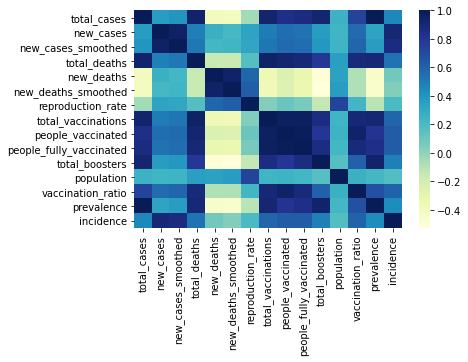

In [314]:
#fig = plt.figure(figsize = (10, 10)) 
  
# plotting correlation heatmap
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu")


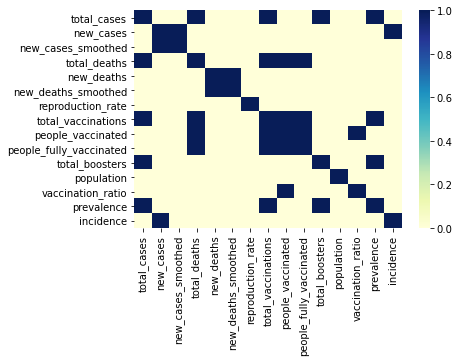

In [65]:
# plotting correlation heatmap for correlation greater than threshold 0.9
dataplot = sns.heatmap(data1.corr()>0.9, cmap="YlGnBu")

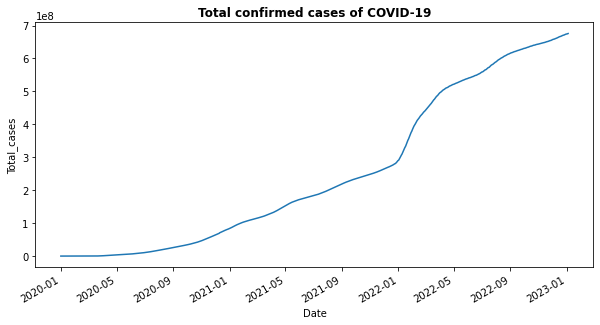

In [319]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_cases'])
plt.title('Total confirmed cases of COVID-19', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()

### Total Confirmed cases increases with time.

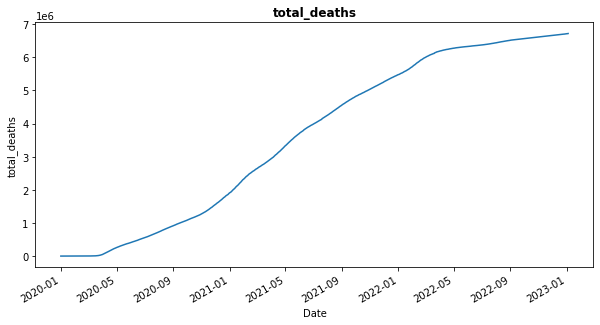

In [318]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_deaths'])
plt.title('total_deaths', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('total_deaths')
plt.gcf().autofmt_xdate()

### Total death is also increases with time and already we have observe the high correletion between total cases and total deaths in correlation plot.


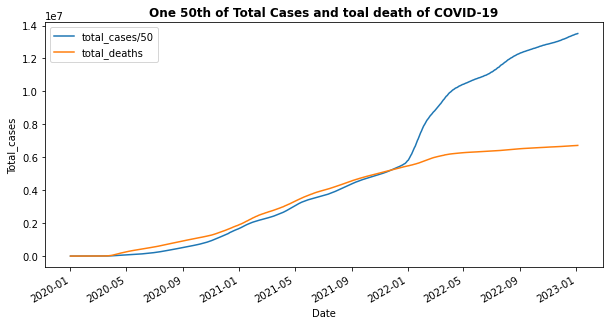

In [317]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_cases']/50, label = "total_cases/50")
plt.plot(data1['date'], data1['total_deaths'], label = "total_deaths")
plt.title('One 50th of Total Cases and toal death of COVID-19', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### Here we observe that total deaths are approxmatly 1/50 the of the total cases till the 2022-01 and after the that factor is lower than the 1/50 means the total death percentage is reduced here.

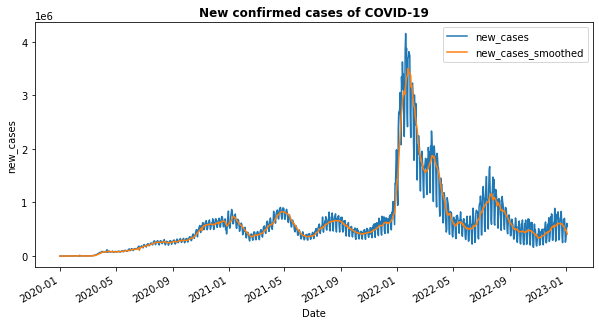

In [320]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['new_cases'], label = "new_cases")
plt.plot(data1['date'], data1['new_cases_smoothed'], label = "new_cases_smoothed")
plt.title('New confirmed cases of COVID-19', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### Three major peaks are observed in new confirmed cases of world. The strengh of peaks get reduced after themain peak.

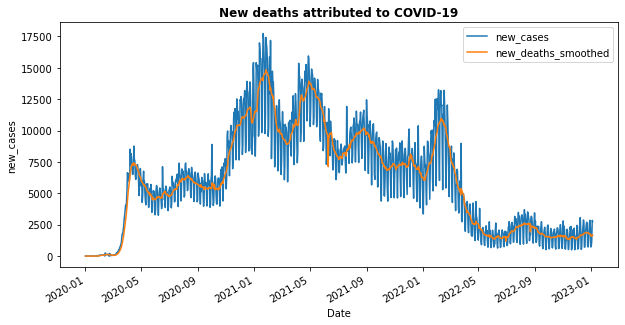

In [321]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['new_deaths'], label = "new_cases")
plt.plot(data1['date'], data1['new_deaths_smoothed'], label = "new_deaths_smoothed")
plt.title('New deaths attributed to COVID-19', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### Strengh of major peaks are similar. 

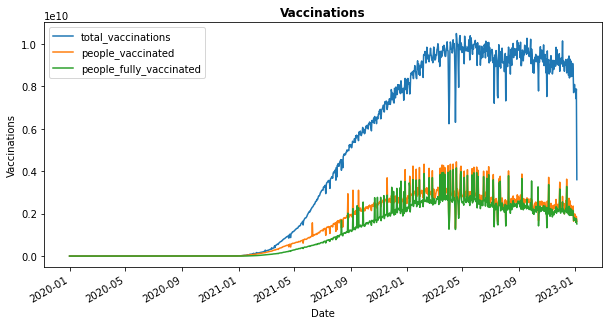

In [322]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_vaccinations'], label = "total_vaccinations")
plt.plot(data1['date'], data1['people_vaccinated'],label = "people_vaccinated")
plt.plot(data1['date'], data1['people_fully_vaccinated'],label = "people_fully_vaccinated")
plt.title('Vaccinations', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.gcf().autofmt_xdate()
plt.legend()

### High Correlation is observed among the total_vaccination, people vaccinated, and people fully vacinated.

# Section 2: Locationwise EDA

In [84]:
data1.columns

Index(['date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'reproduction_rate', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'population',
       'vaccination_ratio', 'prevalence', 'incidence'],
      dtype='object')

In [96]:
def filter_data(data, s1, ID):
    df_id  = data.groupby(s1)
    dat=df_id.get_group(ID)
    return dat

In [114]:
max_total_cases_list = list()
max_total_deaths_list= list()
max_total_vaccination_list = list()    

for i in location_list:
    d= filter_data(data,'location', i).reset_index(drop = True)
    
    max_total_cases = d['total_cases'].max()
    max_total_deaths = d['total_deaths'].max()
    max_total_vaccinations=d['total_vaccinations'].max()
    
    max_total_cases_list.append(max_total_cases)
    max_total_deaths_list.append(max_total_deaths)
    max_total_vaccination_list.append(max_total_vaccinations)
    

In [118]:
'''df1= pd.DataFrame()
df1['location'] = location_list
df1['max_total_cases'] = max_total_cases_list
df1['max_total_deaths'] = max_total_deaths_list
df1['max_total_vaccinations'] = max_total_vaccination_list'''

In [122]:
data_max = {'location': location_list,
        'max_total_cases': max_total_cases_list, 
        'max_total_deaths':max_total_deaths_list,
        'max_total_vaccinations':max_total_vaccination_list       }
  
# Create DataFrame
df1 = pd.DataFrame(data_max)

In [123]:
df1.head()

,location,max_total_cases,max_total_deaths,max_total_vaccinations
0,Afghanistan,207715.0,7850.0,12449870.0
1,Albania,333818.0,3596.0,3025728.0
2,Algeria,271236.0,6881.0,15267442.0
3,Andorra,47751.0,165.0,154367.0
4,Angola,105095.0,1930.0,23701049.0


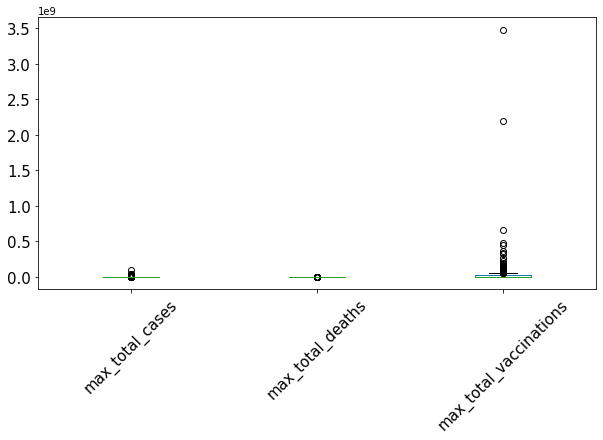

In [323]:
fig = plt.figure(figsize = (10, 5)) 
boxplot = df1.boxplot(grid=False, rot=45, fontsize=15)  

### Outlier is observed for maximum total vaccination for the two countries.

In [127]:
df2 = df1.nlargest(10,"max_total_cases").reset_index(drop=True)

In [128]:
df2

,location,max_total_cases,max_total_deaths,max_total_vaccinations
0,United States,101044032.0,1095235.0,6.638226e+08
1,India,44680543.0,530710.0,2.201153e+09
2,France,39410277.0,162569.0,1.534768e+08
3,Germany,37475448.0,162256.0,1.904680e+08
4,Brazil,36423138.0,694411.0,4.804306e+08
5,Japan,29594073.0,58170.0,3.713929e+08
6,South Korea,29363272.0,32421.0,1.296478e+08
7,Italy,25143705.0,184642.0,1.434244e+08
8,United Kingdom,24135084.0,213249.0,1.512488e+08
9,Russia,21505701.0,385971.0,1.838942e+08


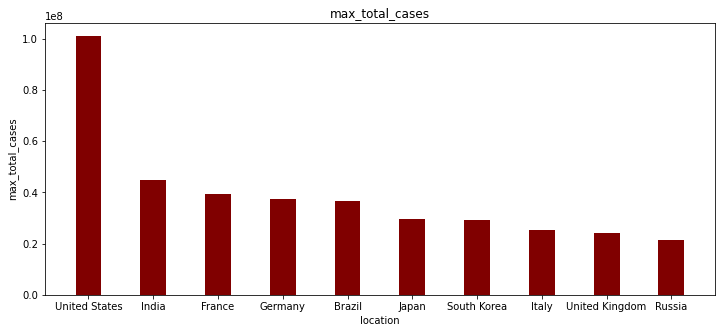

In [140]:
fig = plt.figure(figsize = (12, 5)) 
# creating the bar plot
plt.bar(df2['location'], df2['max_total_cases'], color ='maroon',
        width = 0.4)
plt.xlabel("location")
plt.ylabel("max_total_cases")
plt.title("max_total_cases")
plt.show()

### Showing here the top 10 countries of the maximum total cases. United States has the maximum total cases and second is India.

In [129]:
df3 = df1.nlargest(10,"max_total_deaths").reset_index(drop=True)

In [130]:
df3 


,location,max_total_cases,max_total_deaths,max_total_vaccinations
0,United States,101044032.0,1095235.0,6.638226e+08
1,Brazil,36423138.0,694411.0,4.804306e+08
2,India,44680543.0,530710.0,2.201153e+09
3,Russia,21505701.0,385971.0,1.838942e+08
4,Mexico,7257916.0,331206.0,2.250631e+08
5,Peru,4461129.0,218304.0,8.667156e+07
6,United Kingdom,24135084.0,213249.0,1.512488e+08
7,Italy,25143705.0,184642.0,1.434244e+08
8,France,39410277.0,162569.0,1.534768e+08
9,Germany,37475448.0,162256.0,1.904680e+08


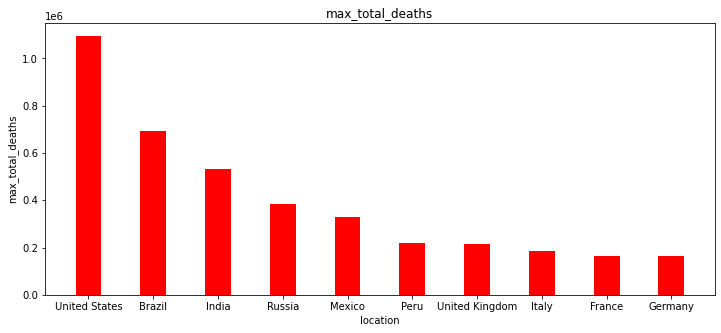

In [145]:
fig = plt.figure(figsize = (12, 5)) 
# creating the bar plot
plt.bar(df3['location'], df3['max_total_deaths'], color ='red',
        width = 0.4)
plt.xlabel("location")
plt.ylabel("max_total_deaths")
plt.title("max_total_deaths")
plt.show()

### United States has the maximum death cases. 

In [131]:
df4 = df1.nlargest(10,"max_total_vaccinations").reset_index(drop=True)

In [132]:
df4

,location,max_total_cases,max_total_deaths,max_total_vaccinations
0,China,1909905.0,5549.0,3.479607e+09
1,India,44680543.0,530710.0,2.201153e+09
2,United States,101044032.0,1095235.0,6.638226e+08
3,Brazil,36423138.0,694411.0,4.804306e+08
4,Indonesia,6721692.0,160657.0,4.431739e+08
5,Japan,29594073.0,58170.0,3.713929e+08
6,Bangladesh,2037208.0,29440.0,3.419905e+08
7,Pakistan,1575887.0,30638.0,3.170809e+08
8,Vietnam,11525491.0,43186.0,2.651143e+08
9,Mexico,7257916.0,331206.0,2.250631e+08


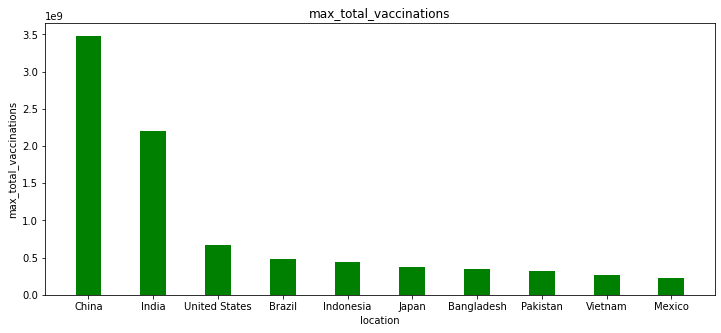

In [146]:
fig = plt.figure(figsize = (12, 5)) 
# creating the bar plot
plt.bar(df4['location'], df4['max_total_vaccinations'], color ='green',
        width = 0.4)
plt.xlabel("location")
plt.ylabel("max_total_vaccinations")
plt.title("max_total_vaccinations")
plt.show()

# Section 3:  EDA of Covid Cases in India

### As find earlier there are two countries has the outlier for the maximum total vaccinations those are China and India. Both Countries has more than 5 times vaccinations of other contries.

In [190]:
location = 'India'
df_location = filter_data(data,'location', loaction).reset_index(drop = True)

In [191]:
df_location.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,0.0,7.056301e-08,7.056301e-08
1,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,0.0,7.056301e-08,0.000000e+00
2,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,0.0,7.056301e-08,0.000000e+00
3,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,0.0,1.411260e-07,7.056301e-08
4,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,0.0,2.116890e-07,7.056301e-08


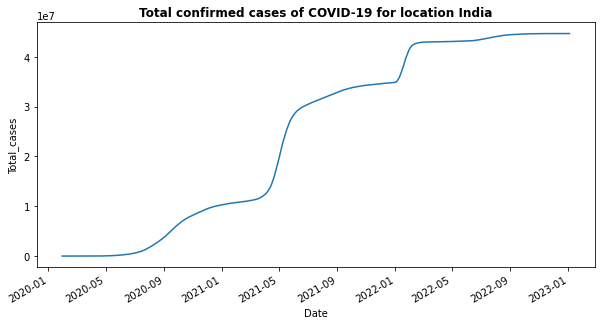

In [324]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(df_location['date'], df_location['total_cases'])
plt.title('Total confirmed cases of COVID-19 for location {}'.format(location), fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()

### The total confirmed cases are approximatly constant in India now, unlike the toal world cases where it was increasing till.

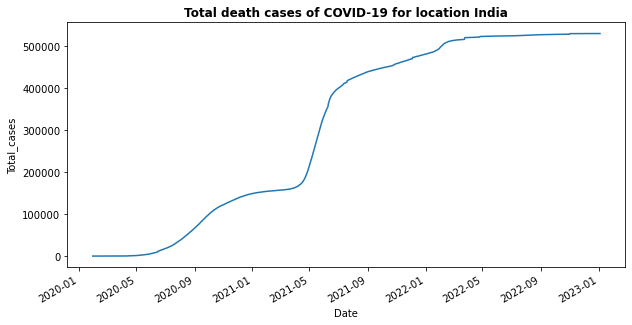

In [325]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(df_location['date'], df_location['total_deaths'])
plt.title('Total death cases of COVID-19 for location {}'.format(location), fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()

### The total death cases is now approximatly constant for the India now.

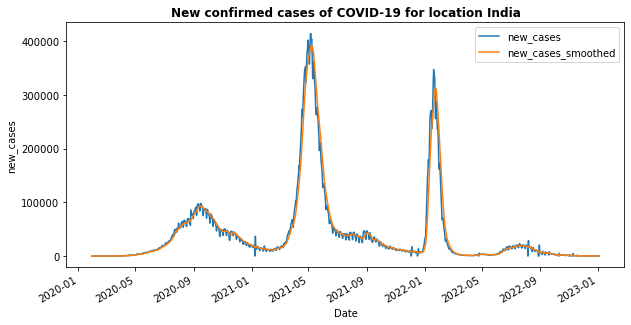

In [326]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(df_location['date'], df_location['new_cases'], label="new_cases")
plt.plot(df_location['date'], df_location['new_cases_smoothed'], label="new_cases_smoothed")
plt.title('New confirmed cases of COVID-19 for location {}'.format(location), fontweight="bold")
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### Two major peaks are observed in the new comfirmed cases in India. Strengh of both peaks are similar unlike the data of the world, where strengh was different.

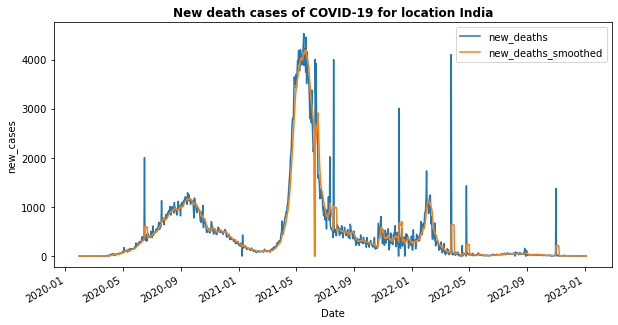

In [327]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(df_location['date'], df_location['new_deaths'], label="new_deaths")
plt.plot(df_location['date'], df_location['new_deaths_smoothed'], label="new_deaths_smoothed")
plt.title('New death cases of COVID-19 for location {}'.format(location), fontweight="bold")
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### Strengh of main peak is higher than the other peaks unlike the world data where strengh of peaks was similar. 

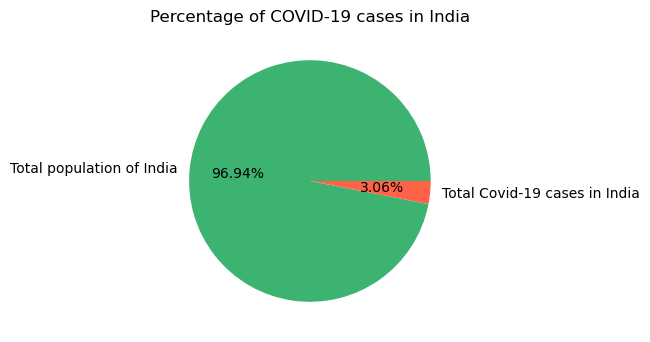

In [194]:
plt.figure(figsize=(8,4),dpi=100)
plt.pie(
    [df_location['population'].max(), df_location['total_cases'].max()],
    autopct='%.2F%%',
    colors = ['#3CB371','#FF6347'],
    labels=['Total population of {}'.format(location),'Total Covid-19 cases in {}'.format(location)],)
plt.title('Percentage of COVID-19 cases in {}'.format(location))
plt.show()

# Section 4: Forecast the Covid Cases in world using SARIMA and LSTM models

In [214]:
data1.head(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173014444.0,0.0,0.0,0.0


In [215]:
data1.tail(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
1099,2023-01-04,675695455.0,553104.0,409433.139,6720075.0,2755.0,1663.719,0.0,3.600214e+09,1.640681e+09,1.514283e+09,523375304.0,8.009947e+09,1427.0681,4086.514237,2.26267


In [217]:
my_range = pd.date_range(
  start="2020-01-01", end="2023-01-04", freq='D')
 
print(my_range.difference(data1['date']))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


#### Cheking for the continous dates so that we can apply the forecast Models.


# 4.1 SARIMA Model for Forecasting Total Covid Cases


In [1]:
#pip install pmdarima

In [226]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dateutil.relativedelta import relativedelta
from pmdarima import auto_arima

In [242]:
import datetime

In [227]:
data_frame=data1[['date','total_cases']]

In [246]:

X = data_frame['total_cases'].values
X = X.astype('float32')   

Sarimax_model = auto_arima(X,
                    start_P=1,
                    start_q=1,
                    test='adf',
                    max_p=3,
                    max_q=3,
                    m=12,
                    seasonal=True,
                    d=None,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
Sarimax_model.summary()                      
print(Sarimax_model.summary())
my_order = Sarimax_model.order
my_seasonal_order = Sarimax_model.seasonal_order



Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=30970.560, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=30210.034, Time=0.88 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=30335.984, Time=0.81 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=30431.063, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=30062.131, Time=2.04 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=30899.964, Time=1.36 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=30041.296, Time=4.56 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=30157.528, Time=1.32 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.52 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.85 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=29955.755, Time=6.23 sec
 ARIMA(3,1,0)(1,1,0)[12]           

In [247]:
model = SARIMAX(X,order=my_order,
                seasonal_order=my_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


In [248]:
forecast1 = results.predict(start = 0,
                    end=len(X)-1,
                    typ='levels')

In [249]:
future_time=30*6

In [250]:
data = pd.DataFrame(forecast1, columns = ['Forecast'])
# reset index without removing default index
#data_frame.reset_index(level =['Date'], inplace = True)
dat1 = pd.concat([data_frame['date'], data_frame['total_cases'], data['Forecast']], axis=1)
a=len(dat1['date'])
dat1['date'] = pd.to_datetime(dat1.date).dt.tz_localize(None)
dat1.date = dat1.date.astype(str)
#dat1.to_csv("AHU{}_Heat_forecast_history.csv".format(i))
start = datetime.datetime.strptime(dat1['date'][a-1], "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(0,future_time)]
future = pd.DataFrame(date_list, columns=['date'])
future['Forecast']  = results.predict(start = len(X),
                    end=len(X)+future_time-1,
                    typ='levels')
output= future

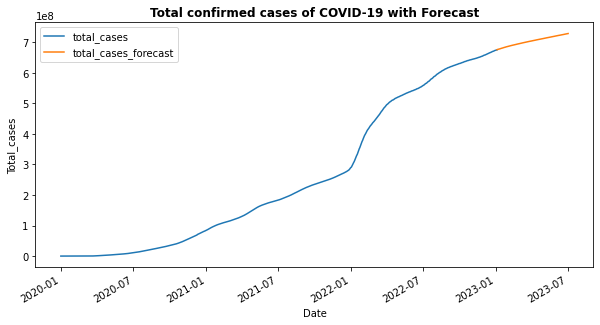

In [254]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_cases'], label = "total_cases")
plt.plot(output['date'], output['Forecast'], label = "total_cases_forecast")
plt.title('Total confirmed cases of COVID-19 with Forecast', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()
plt.legend()

### We forecast the total confirmed cases worldwide for the next 180 Days. We find that in July 2023 total cases will be more than the 7x10^8 number. The rate of increment is decreases comparative to the 2022-01, so its showing the good sign that Covid strengh is reducing.

# 4.2 LSTM Model for Forecasting Total Covid Cases

In [2]:
#pip install tensorflow

In [258]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [259]:
x_colName = 'date'
y_colName = 'total_cases'
data_frame=data1[['date','total_cases']]

ds =data_frame[y_colName].values

#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [295]:
n= len(ds_scaled)


#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size


#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]


#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)


#Taking 100 hrs data as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [296]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [297]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='ReLU'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
11/11 [==============================] - 9s 314ms/step - loss: 0.0150 - val_loss: 0.0902
Epoch 2/10
11/11 [==============================] - 2s 188ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 3/10
11/11 [==============================] - 2s 201ms/step - loss: 7.2034e-04 - val_loss: 1.4514e-04
Epoch 4/10
11/11 [==============================] - 2s 200ms/step - loss: 2.4254e-04 - val_loss: 0.0023
Epoch 5/10
11/11 [==============================] - 2s 190ms/step - loss: 1.6180e-04 - val_loss: 6.3835e-04
Epoch 6/10
11/11 [==============================] - 2s 199ms/step - loss: 1.0097e-04 - val_loss: 4.6514e-04
Epoch 7/10
11/11 [==============================] - 2s 191ms/step - loss: 9.5176e-05 - val_loss: 5.4297e-04
Epoch 8/10
11/11 [==============================] - 2s 197ms/step - loss: 8.3674e-05 - val_loss: 7.8603e-05
Epoch 9/10
11/11 [==============================] - 2s 201ms/step - loss: 6.8986e-05 - val_loss: 2.6732e-04
Epoch 10/10
11/11 [=============================

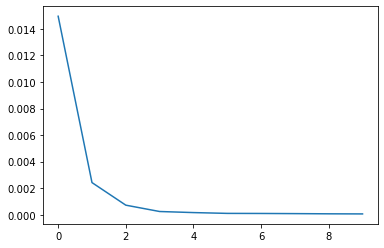

In [298]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [299]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 0s 36ms/step


In [300]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

#Comparing using visuals
#plt.plot(normalizer.inverse_transform(ds_scaled))
#plt.plot(train_predict)
#plt.plot(test_predict)


test = np.vstack((train_predict,test_predict))


#Combining the predited data to create uniform data visualization
#plt.plot(normalizer.inverse_transform(ds_scaled))
#plt.plot(test)

#Getting the last 100 days records
fut_inp = ds_test[len(ds_test)-100:]


fut_inp = fut_inp.reshape(1,-1)

tmp_inp = list(fut_inp)

#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [301]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
future_days = 30*6
while(i<future_days):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,100+future_days+1)

#plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[n-100:]))
#plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

ds_new = ds_scaled.tolist()



#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
#plt.plot(ds_new[n-100:])


#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

#Plotting final results with predicted value after 30 Days
#plt.plot(final_graph,)
#plt.ylabel(y_colName)
#plt.xlabel(x_colName)
##plt.title("{0} prediction of next month open".format(stock_symbol))
##plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
#plt.legend()



#plt.plot(final_graph [-future_days:])

In [302]:
#Separate dates for future plotting
train_dates = pd.to_datetime(data1['date'])
print(train_dates.tail(5)) #Check last few dates. 

a_f = list()
for i in range(len(final_graph [-future_days-1:-1])):
    a_f.append(final_graph [-future_days-1:][i][0])
    

n_past = 1
n_days_for_prediction=future_days 

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction,  freq='D').tolist()

print('last Timestamp:', list(train_dates)[-n_past] )

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i)
    

1095   2022-12-31
1096   2023-01-01
1097   2023-01-02
1098   2023-01-03
1099   2023-01-04
Name: date, dtype: datetime64[ns]
last Timestamp: 2023-01-04 00:00:00


In [308]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'Forecast':a_f})
#df_forecast['Time']=pd.to_datetime(df_forecast['Time'])
df_forecast['date'] = pd.to_datetime(df_forecast['date'].astype(str), format="%Y-%m-%d ")

In [309]:
#df_forecast=df_forecast.iloc[1:,:]

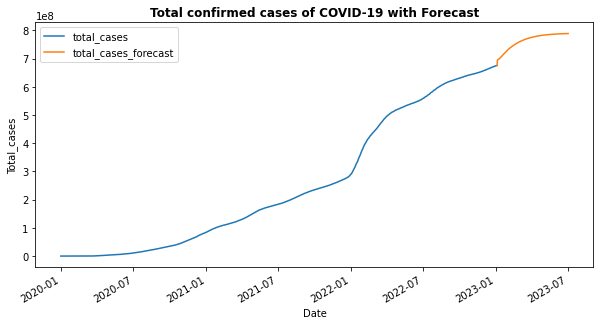

In [311]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data1['date'], data1['total_cases'], label = "total_cases")
plt.plot(df_forecast['date'], df_forecast['Forecast'], label = "total_cases_forecast")
plt.title('Total confirmed cases of COVID-19 with Forecast', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Total_cases')
plt.gcf().autofmt_xdate()
plt.legend()

###  The LSTM model is also giving the similar forecast of total covid cases for the next 180 Days. Rate of the total cases is decreasing and that's good sign.

# Section 5: Conclusions: 
### We observed that the United State is country which suffered most with total Covid Cases and total death Cases.
### Total Covid cases and death cases in world is increasing with slow rate, but in India its constant in both. So its the good sign for the India.
### India faced the two high strength peaks in total Covid Cases where World has seen one major peak and follwed  two weak peaks.
### India has two main peaks of similar strength for the total cases. But for death cases India has two peaks but with the different strength.
### Forcast models are giving the similar result for the next 180 days and we find that by July 2023 total cases will be more than the 7x10^8.

